# Reševanje problemov s preiskovanjem

Preiskovalni algoritmi ponujajo splošni pristop k reševanju problemov. Ideja tega pristopa je preprosta: do rešitve problema pridemo s preiskovanjem _prostora možnih rešitev_. Prvi korak pri reševanju problemov s preiskovanjem je torej definiranje _prostora stanj_, ki ustrezajo _možnim rešitvam_. V drugem koraku izberemo _preiskovalni algoritem_ in ga uporabimo na definiranem prostoru stanj zato, da dobimo _pravo rešitev_. V okviru predavanja bomo spoznali pojme iz prejšnjih dveh stavkov in vsebino poglavja z naslovom X učbenika {cite}`russell2019aima`.

Vzemimo za primer reševanje Diofatnske enačba $4 x_1 - 3 x_2 = 13$ v množici naravnih števil. Možne rešitve podane enačbe so vsi možni pari naravnih števil. Primer prave rešitve je par $\left<4, 1\right>$. Pozor, to ni edina _prava rešitev_ podane Diofantske enačbe: koliko je pravih rešitev podane Diofantkse enačbe v množici naravnih števil?

## Prostor stanj in rešitve

```{prf:definition} Prostor stanj
:label: def-prostor-stanj

Prostor stanj za podan problem je četverica $\mathcal{S} = \left< S, P, s_0, S_K \right>$, kjer je:
  - $S$ _množica stanj_, ki ustrezajo _možnim_ rešitvam podanega problema;
  - $s_0 \in S$ je začetno stanje;
  - $S_K \subseteq S$ je množica končnih stanj, ki ustrezajo _pravim rešitvam_ podanega problema;
  - $P$ _funkcija prehoda_ med stanji, ki preslika trenutno stanje $s \in S$ v množico parov $\left< (t, c) \right>$, pri čemer $t \in S$ predstavlja _naslednje stanje_ v katero lahko _preidemo_ iz stanja $s$ in je $c \in \mathbb{R}_{\gt 0}$ _cena_ tega prehoda.
```

Za primer podane Diofantske enačbe iz prejšnjega razdelka očitno velja $S = \mathbb{N} \times \mathbb{N}$. Množico pravih rešitev lahko definiramo tudi tako, da nam ni treba podati seznama rešitev, s predpisom $S_K = \{(x_1, x_2) \in S \colon 4 x_1 - 3 x_2 = 13\}$. Taka definicija nam omogoča, da za podano možno rešitev preverimo, če je prava.

Začetno stanje in funkcijo prehoda za ta primer lahko definiramo na različne načine. Oglejmo si enega od najbolj preprostih. Nastavimo začetno stanje na $s_0 = \left< 0, 0 \right>$ (pri tem predmetu bo velja dogovor, da je $0 \in \mathbb{N}$). Nato definiramo $P(\left< x_1, x_2 \right>) = \{ \left< \left< x_1 + 1, x_2 \right>, 1 \right>, \left< \left< x_1, x_2 + 1 \right>, 1 \right> \}$. Torej podanemu stanju, t.j, paru naravnih števil priredimo dve _naslednji_ stanji (dvojici) tako, da najprej prvi nato pa še drugi element podanega stanja nadomestimo z naslednikom tega elementa v množici naravnih števil. Oba prehoda iz podanega v naslednjo stanje imata ceno $1$.

Premisli ali nam tako definirana funkcija prehoda zagotavlja dosegljivost poljubnega para naravnih števil. Namig: za podano stanje $\left< x_1, x_2 \right>$ lahko našteješ prehode, ki pripeljejo iz začetnega do podanega stanja. Kakšna je skupna cena teh prehodov?

Definirajmo zdaj dosegljivost in pot v prostoru stanj bolj formalno.

```{prf:definition} Pot v prostoru stanj in cena poti
:label: def-pot

Pot v prostoru stanj $\mathcal{S} = \left< S, P, s_0, S_K \right>$ je zaporedje stanj $p = s_0, s_1, s_2, \dots, s_n$, kjer za vsak $0 \lt i \le n$ velja $\left< s_i, c_i \right> \in P(s_{i-1})$. Za pot $p$ rečemo, da se začne v stanju $s_0$ in konča v stanju $s_n$. Cena $\textrm{cena}(p)$ poti $p$ je definirana kot vsota cen vseh prehodov iz $s_{i-1}$ v $s_i$, t.j., $\sum_{i = 1}^{n} c_i $.
```

Oglejmo si zdaj še en primer prostora stanj, kjer dobi pojem pot v prostoru stanj svoj običajen slovarski pomen. Potovanje po Romuniji.

```{prf:definition} Dosegljivost stanja in prostora stanj
:label: def-dosegljivost

Stanje $s \in S$ iz prostora stanj $\mathcal{S} = \left< S, P, s_0, S_K \right>$ je dosegljivo, če obstaja pot $p = s_0, s_1, \dots, s$, ki se konča v stanju $s$. Prostor stanj $\mathcal{S}$ je dosegljiv, če je vsako stanje $s \in S$ dosegljivo.
```

Premisli katera lastnost grafa, ki jo poznamo iz teorije grafov, ustreza dosegljivost v prostoru stanj, ki ga ponazori zemljevid cest po Romuniji?

S pomočjo poti lahko tudi definiramo rešitev v prostoru stanj.

```{prf:definition} Rešitev in optimalna rešitev v prostoru stanj
:label: def-resitev

Rešitev v prostoru stanj je pot $r = s_0, s_1, \dots, s_k$, ki se konča v končnem stanju $s_k \in S$. Cena rešitve $r$ je enaka ceni $\textrm{cena}{r}$ poti $r$. Optimalna rešitev je rešitev $r$ z najmanjšo ceno, torej rešitev za katero velja, da imajo vse druge rešitve $q$ v istem prostoru stanj ceno, ki je višja od $\textrm{cena}(r)$, $\textrm{cena}(q) \geq \textrm{cena}(r)$.
```

Za Diofantsko enačbe je rešitev pot od stanja $\left< 0, 0 \rigth>$ do stanja $\left< 4, 1 \right>$. Premisli kakšna je cena te rešitve in ali je ta rešitev optimalna. V primeru potovanja po Romuniji je rešitev katerakoli pot iz Arada v Bukarešto, optimalna rešitev najkrajša taka pot.

In [15]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ROOT = Path.cwd().resolve().parent
MATERIALI = ROOT / "materiali"


In [16]:
df = pd.read_csv(MATERIALI / "podatki.csv")
df


,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25


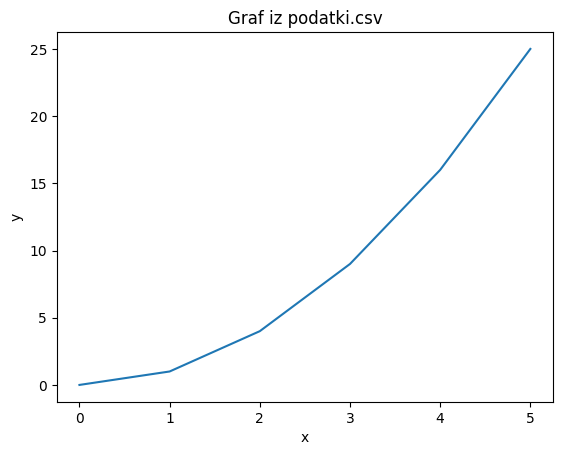

In [17]:
plt.figure()
plt.plot(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graf iz podatki.csv")
plt.show()


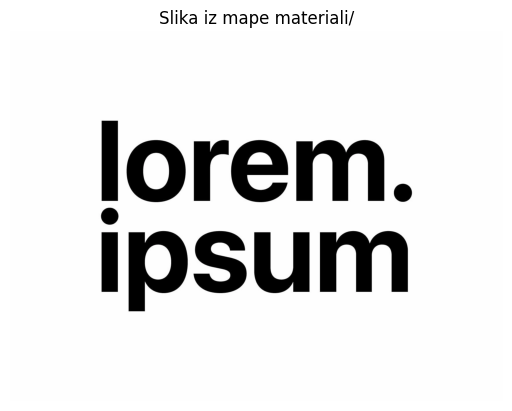

In [18]:
img = mpimg.imread(MATERIALI / "lorem-ipsum.jpg")

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title("Slika iz mape materiali/")
plt.show()


## Literatura

```{bibliography}
```
